<a href="https://colab.research.google.com/github/IlarjaL/CIS9655/blob/trial/World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Content
# * [Part 1: overall ranking, what are the most happy countries, what are least happy countries - Hillary
# * [Part 2: geography: where are most/least happy countries located, are they in clusters or spread, are they warmer or colder? - Hillary
# * [Part 3: financially? Are they rich or poor? Yooeun
# * [Part 4: correlation between healthy life expectancy, social support and ranking of happiness Yooeun
# * [Part 5: changes, we can compare 2019 to 2015 and analyze if there are any major changes of the ranking Summer
# * [Part 6: our conclusion, how US is doing over the years Summer 


Reference 
Useful notebooks
https://github.com/Alvin1359/world-happiness-report/blob/main/Final_Data_Analysis.ipynb
https://github.com/RoyMachineLearning/World-Happiness-Report/blob/master/data-visualization-tools-seaborn-and-plotly.ipynb


# New Section

In [ ]:
# Part 1: Load Data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Loading data, reading in files
df_15 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2015.csv')
df_16 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2016.csv')
df_17 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2017.csv')
df_18 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2018.csv')
df_19 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2019.csv')
df_20 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2020.csv')
df_21 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2021.csv')

In [ ]:
#Dropping N/A values for 2015
df_15 = df_15.dropna()

In [ ]:
#Checking there are no null values
df_15.info()

In [ ]:
#Dropping N/A values for 2016
df_16 = df_16.dropna()

In [ ]:
#Checking there are no null values
df_16.info()

In [ ]:
#Dropping N/A values for 2017
df_17 = df_17.dropna()

In [ ]:
#Checking there are no null values
df_17.info()

In [ ]:
#Dropping N/A values for 2018
df_18 = df_18.dropna()

In [ ]:
#Checking there are no null values
df_18.info()

In [ ]:
#Dropping N/A values for 2019
df_19 = df_19.dropna()

In [ ]:
#Checking there are no null values
df_19.info()

In [ ]:
#Dropping N/A values for 2020
df_20 = df_20.dropna()

In [ ]:
#Checking there are no null values
df_20.info()

In [ ]:
#Dropping N/A values for 2021
df_21 = df_21.dropna()

In [ ]:
#Checking there are no null values
df_21.info()

In [ ]:
#Removing unnecessary columns
df_21 = df_21.drop(columns = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Dystopia + residual', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption'])


df_21

In [ ]:
df_15 = df_15.rename(columns = {'Happiness Rank':'Rank', 'Happiness Score' : 'Score', 
                                      'Economy (GDP per Capita.)' : 'gdp_per_capita', 'Health (Life Expectancy)' : 'Health',
                                      'Trust (Government Corruption)' : 'gov_corruption', 'Dystopia Residual' : 'Dystopia'})
df_15['Year'] = 2015

df_16 = df_16.rename(columns = {'Happiness Rank':'Rank', 'Happiness Score' : 'Score', 
                                      'Economy (GDP per Capita.)' : 'gdp_per_capita', 'Health (Life Expectancy)' : 'Health',
                                      'Trust (Government Corruption)' : 'gov_corruption', 'Dystopia Residual' : 'Dystopia'})
df_16['Year'] = 2016

df_17 = df_17.rename(columns = {'Happiness.Rank':'Rank', 'Happiness.Score' : 'Score', 
                                      'Economy..GDP.per.Capita.' : 'gdp_per_capita', 'Health..Life.Expectancy.' : 'Health',
                                      'Trust..Government.Corruption.' : 'gov_corruption', 'Dystopia.Residual' : 'Dystopia'})
df_17['Year'] = 2017 
df_18 = df_18.rename(columns = {'Overall rank':'Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'gdp_per_capita', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health','Freedom to make life choices' : 'Freedom',
                                      'Perceptions of corruption' : 'gov_corruption'})
df_18['Year'] = 2018

df_19 = df_19.rename(columns = {'Overall rank':'Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'gdp_per_capita', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health','Freedom to make life choices' : 'Freedom'
                                     , 'Perceptions of corruption' : 'gov_corruption'})
df_19['Year'] = 2019 

df_20 = df_20.rename(columns = {'Happiness Rank': 'Rank', 'Country name' : 'Country', 'Regional indicator': 'Region', 'Ladder score' : 'Happiness Score', 
                                      'Logged GDP per capita' : 'gdp_per_capita', 'Social support' : 'Family', 'Healthy life expectancy' : 'Health',
                                      'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'gov_corruption'})
df_20['Rank'] =  range(1, len(df_20.index)+1)
df_20['Year'] = 2020 


df_21 = df_21.rename(columns = {'Happiness Rank': 'Rank', 'Country name' : 'Country', 'Regional indicator': 'Region', 'Ladder score' : 'Score', 
                                      'Logged GDP per capita' : 'gdp_per_capita', 'Social support' : 'Family', 'Healthy life expectancy' : 'Health',
                                      'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'gov_corruption'})
df_21['Rank'] =  range(1, len(df_21.index)+1)
df_21['Year'] = 2021


df_21

In [ ]:
happy_df = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2019.csv', index_col=False)
happy_df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [ ]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
#Changing the "Overall Rank" type to string to ensure python does not conduct calculations on this column
happy_df["Overall rank"] = happy_df["Overall rank"].map(str)

In [ ]:
#Confirming changes
happy_df.dtypes

Overall rank                     object
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [ ]:
happy_df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
happy_df_columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [ ]:
happy_df = happy_df[happy_df_columns].copy()

In [ ]:
#Renaming the columns for easier analysis and creating a new df to not affect the original
df = happy_df.rename({'Overall rank': 'rank', 'Country or region':'country', 'Score':'score', 'GDP per capita':'gdp_per_capita',
       'Social support':'social_support', 'Healthy life expectancy':'healthy_life_expectancy',
       'Freedom to make life choices':'freedom_to_choose', 'Generosity':'generosity',
       'Perceptions of corruption':'perception_of_corruption'}, axis=1)

In [ ]:
df.head(10) 

,rank,country,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_choose,generosity,perception_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [ ]:
# * [Part 3: financially? Are they rich or poor?   YOOEUN PARK 

df = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2021.csv', index_col=False)
df = df.rename({'Country name': 'country', 'Regional indicator':'region', 'Ladder score':'score', 'Standard error of ladder score':'sterror_score',
       'Logged GDP per capita':'gdp_per_capita', 'Healthy life expectancy':'healthy_life_expectancy',
       'Social support':'social_support', 'Freedom to make life choices':'freedom',
       'Perceptions of corruption':'perception_of_corruption'}, axis=1)             
df.head(10)

,country,region,score,sterror_score,upperwhisker,lowerwhisker,gdp_per_capita,social_support,healthy_life_expectancy,freedom,Generosity,perception_of_corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


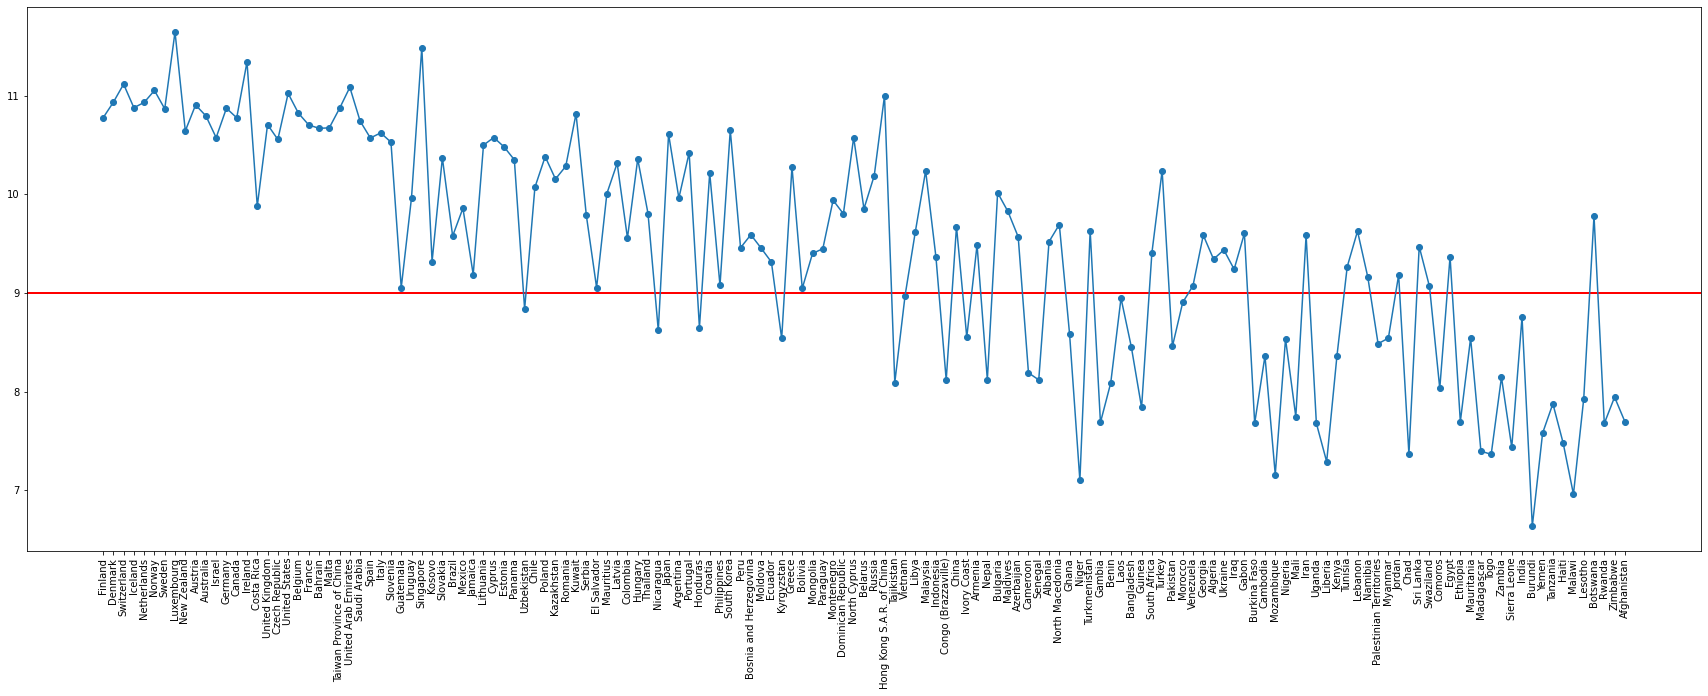

In [ ]:
x = df.country               # set x-axis
y = df.gdp_per_capita         # set y-axis

plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.axhline(y=9, color='r', linewidth=2)
plt.scatter(x, y)
plt.plot(x, y)

<BarContainer object of 149 artists>

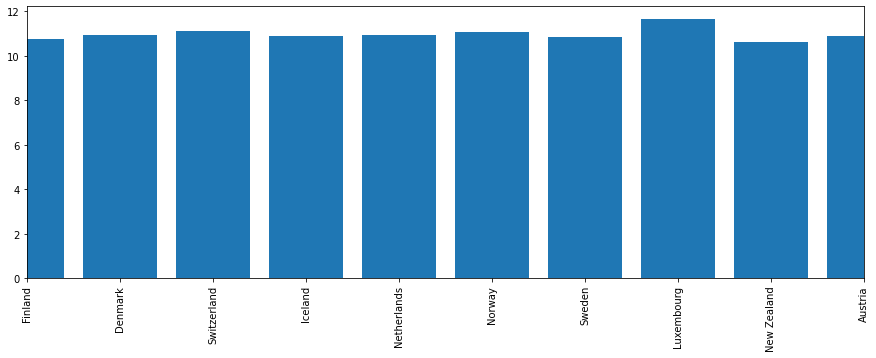

In [ ]:
x = df.country                # set x-axis
y = df.gdp_per_capita         # set y-axis

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlim(0,9)
plt.bar(x, y)


<BarContainer object of 149 artists>

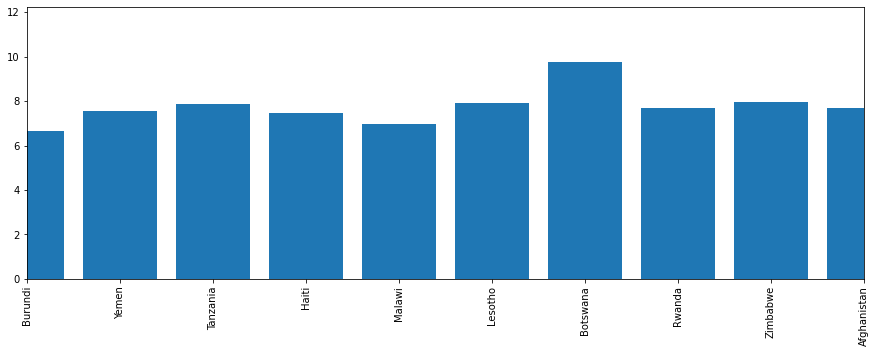

In [ ]:
x = df.country                # set x-axis
y = df.gdp_per_capita         # set y-axis

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlim(139,148)
plt.bar(x, y)

In [ ]:
# * [Part 4: correlation between healthy life expectancy, social support and ranking of happiness Yooeun



In [ ]:
import json

In [ ]:
#from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Uploading geojson file to create maps with statistical information
#path = '/content/drive/MyDrive/countries.geojson'
path = 'https://gist.githubusercontent.com/IlarjaL/9b02ec980db65125f15692b70349c44e/raw/e13c70c02cd3afdce4bcc0b5397cdcbef8567c9f/map.geojson'
#states = pd.read_json('https://gist.githubusercontent.com/IlarjaL/9b02ec980db65125f15692b70349c44e/raw/e13c70c02cd3afdce4bcc0b5397cdcbef8567c9f/map.geojson')
states = json.load(open(path, 'r'))

FileNotFoundError: ignored

In [ ]:
states = pd.read_json('https://gist.githubusercontent.com/IlarjaL/9b02ec980db65125f15692b70349c44e/raw/e13c70c02cd3afdce4bcc0b5397cdcbef8567c9f/map.geojson')
states = json.dumps(states)

TypeError: ignored

In [ ]:
#Creating a mapping for the states in between the source file and the geojson
state_id_map = {}
for feature in states['features']:
  feature['id'] = feature['properties']['ISO_A3']
  state_id_map[feature['properties']['ADMIN']] = feature['id']

In [ ]:
states['features'][1]['properties']

{'ADMIN': 'Afghanistan', 'ISO_A3': 'AFG'}

In [ ]:
df.head()

,rank,country,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_choose,generosity,perception_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
#Replacing namin conventions for some states to overcome differences between the two data sources
df['country'].replace(['United States', 'Trinidad & Tobago', 'Serbia', 'Hong Kong', 'North Macedonia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Palestinian Territories', 'Tanzania'], 
                      ['United States of America', 'Trinidad and Tobago', 'Republic of Serbia', 'Hong Kong S.A.R.', 'Macedonia', 'Democratic Republic of the Congo', 'Republic of Congo', 'Palestine', 'United Republic of Tanzania'], inplace=True)

In [ ]:
#Creating new id column
df['id'] = df['country'].apply(lambda x: state_id_map[x])

In [ ]:
df.head()

,rank,country,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_choose,generosity,perception_of_corruption,id
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD


In [ ]:
import plotly.express as px

In [ ]:
#Mapping out the happiness score
fig = px.choropleth(df, locations ='id', geojson = states, color='score')
fig.show()

TypeError: ignored

In [ ]:
top10 = df.head(10)

In [ ]:
fig = px.choropleth_mapbox(top10, locations ='id', geojson = states, color='score', mapbox_style='open-street-map', zoom=1, opacity=0.5, height = 700, width=1300)
fig.show()

In [ ]:
low10 = df.tail(10)
low10

In [ ]:
#Plotting correlation between happiness and GDP

plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot of correlation of Happiness Score and GDP')
sns.scatterplot(x = df.head(10).score, y = df.gdp_per_capita, hue = df.head(10).country, s = 200, markers=True);

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness Score') 
plt.ylabel('GDP per capita')


Part 3

In [ ]:
from plotnine import ggplot, aes, geom_line
df_19 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2019.csv', index_col=False)
df_15 = pd.read_csv('https://raw.githubusercontent.com/IlarjaL/CIS9655/main/data/2015.csv', index_col=False)
df_19 = df_19.rename(columns={df_19.columns[0]: 'Rank_2019',df_19.columns[1]: 'Country', })
df_19 = df_19[['Country','Rank_2019']]
df_19.head(5)

In [ ]:
df_15 = df_15.rename(columns={df_15.columns[2]: 'Rank_2015' })
df_15 = df_15[['Country','Rank_2015']]
df_15.head(5)

In [ ]:
df = pd.merge(df_19, df_15, how="inner", on='Country')
ranking = df.head(15)

In [ ]:
x = ["2015", "2019"]
fig, ax = plt.subplots()


for (idx, row) in ranking.iterrows():
  ax.plot(x, [row[1], row[2]])
  
  
plt.figure(figsize=(30, 30))
plt.show()
